In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('../data/all-data.csv', encoding='ISO-8859-1', header=None)

# Preview the data
print("Shape of data:", df.shape)
df.head()


Shape of data: (4846, 2)


,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [2]:
# Rename columns
df.columns = ['Sentiment', 'News_Headline']

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Show unique classes and their counts
print("\nSentiment Class Distribution:")
print(df['Sentiment'].value_counts())

# Preview again
df.head()


Missing values:
 Sentiment        0
News_Headline    0
dtype: int64

Sentiment Class Distribution:
Sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64


,Sentiment,News_Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [3]:
# Label Encoding
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['Sentiment_Label'] = df['Sentiment'].map(label_mapping)

# Check if it worked
df[['Sentiment', 'Sentiment_Label']].head()



,Sentiment,Sentiment_Label
0,neutral,1
1,neutral,1
2,negative,0
3,positive,2
4,positive,2


In [4]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [6]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return ' '.join(text)

# Apply preprocessing
df['Cleaned_Headline'] = df['News_Headline'].apply(clean_text)

# Preview cleaned text
df[['News_Headline', 'Cleaned_Headline']].head()





[nltk_data] Downloading package stopwords to C:\Users\SHIVANSHU
[nltk_data]     SRIVASTAVA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\SHIVANSHU
[nltk_data]     SRIVASTAVA\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\SHIVANSHU
[nltk_data]     SRIVASTAVA\AppData\Roaming\nltk_data...


,News_Headline,Cleaned_Headline
0,"According to Gran , the company has no plans t...",according gran company plan move production ru...
1,Technopolis plans to develop in stages an area...,technopolis plan develop stage area less squar...
2,The international electronic industry company ...,international electronic industry company elco...
3,With the new production plant the company woul...,new production plant company would increase ca...
4,According to the company 's updated strategy f...,according company updated strategy year baswar...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # You can change max_features as needed

# Fit and transform the cleaned text
X_tfidf = tfidf.fit_transform(df['Cleaned_Headline'])

# Target labels
y = df['Sentiment_Label']


In [8]:
print("TF-IDF Feature Matrix Shape:", X_tfidf.shape)


TF-IDF Feature Matrix Shape: (4846, 5000)


In [9]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (3876, 5000)
Test shape: (970, 5000)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.734020618556701

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.45      0.56       121
           1       0.74      0.93      0.82       576
           2       0.71      0.46      0.56       273

    accuracy                           0.73       970
   macro avg       0.73      0.61      0.65       970
weighted avg       0.73      0.73      0.71       970



In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
rf_pred = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.7360824742268042

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.41      0.53       121
           1       0.74      0.93      0.83       576
           2       0.70      0.47      0.56       273

    accuracy                           0.74       970
   macro avg       0.73      0.60      0.64       970
weighted avg       0.73      0.74      0.72       970



In [12]:
import xgboost as xgb
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate performance
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))


C:\Users\SHIVANSHU SRIVASTAVA\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [16:48:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7422680412371134

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.49      0.59       121
           1       0.76      0.90      0.83       576
           2       0.68      0.52      0.59       273

    accuracy                           0.74       970
   macro avg       0.73      0.64      0.67       970
weighted avg       0.74      0.74      0.73       970



In [13]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred),  # y_pred is logistic regression predictions
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, xgb_pred)
]

for name, acc in zip(models, accuracies):
    print(f"{name}: {acc:.4f}")


Logistic Regression: 0.7340
Random Forest: 0.7361
XGBoost: 0.7423


In [14]:
import yfinance as yf

# Example: Apple stock data
stock_data = yf.download('AAPL', start='2021-01-01', end='2021-12-31')
print(stock_data.head())


C:\Users\SHIVANSHU SRIVASTAVA\AppData\Local\Temp\ipykernel_35960\1627319891.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('AAPL', start='2021-01-01', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2021-01-04  126.239708  130.336813  123.654626  130.249021  143301900
2021-01-05  127.800507  128.512634  125.283710  125.732447   97664900
2021-01-06  123.498528  127.839515  123.283916  124.591092  155088000
2021-01-07  127.712700  128.405313  124.727667  125.215418  109578200
2021-01-08  128.815018  129.380811  127.039597  129.185698  105158200


In [15]:
# Reset index to get 'Date' column
stock_data = stock_data.reset_index()

# Calculate price movement (next day's close - today's close)
stock_data['Price_Change'] = stock_data['Close'].shift(-1) - stock_data['Close']

# Label UP (1) if next day's close is higher, else DOWN (0)
stock_data['Movement'] = stock_data['Price_Change'].apply(lambda x: 1 if x > 0 else 0)

# Drop last row since it has no future close price to compare
stock_data = stock_data[:-1]

# Show sample
print(stock_data[['Date', 'Close', 'Price_Change', 'Movement']].head())


Price        Date       Close Price_Change Movement
Ticker                   AAPL                      
0      2021-01-04  126.239708     1.560799        1
1      2021-01-05  127.800507    -4.301979        0
2      2021-01-06  123.498528     4.214172        1
3      2021-01-07  127.712700     1.102318        1
4      2021-01-08  128.815018    -2.994804        0


In [16]:
# Assign sentiment scores
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}

# If your df does not have a 'Date' column, you need to add it or load it accordingly.
# For demonstration, let's create a dummy 'Date' column (remove this if you already have dates).
import numpy as np
import pandas as pd

if 'Date' not in df.columns:
	np.random.seed(0)
	df['Date'] = pd.to_datetime(
		np.random.choice(pd.date_range('2021-01-01', periods=30), size=len(df))
	)

df['Sentiment_Score'] = df['Sentiment'].map(sentiment_mapping)

# Group by date and average sentiment score
daily_sentiment = df.groupby('Date').agg({'Sentiment_Score': 'mean'}).reset_index()
print(daily_sentiment.head())


        Date  Sentiment_Score
0 2021-01-01         0.164474
1 2021-01-02         0.225166
2 2021-01-03         0.111111
3 2021-01-04         0.236559
4 2021-01-05         0.124260


In [20]:
# Flatten MultiIndex columns in stock_data if present
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = ['_'.join([str(i) for i in col if i]).strip('_') for col in stock_data.columns.values]

# 🔍 Print column names for debugging
print("Stock Data Columns:", stock_data.columns)
print("Daily Sentiment Columns:", daily_sentiment.columns)

# ✅ Automatically detect and use the correct date column from stock_data
date_col = None
for col in stock_data.columns:
    if 'date' in col.lower():
        date_col = col
        break

if date_col is None:
    raise ValueError("No date-like column found in stock_data!")

# 🧠 Now merge using the detected date column
merged_df = pd.merge(stock_data, daily_sentiment, left_on=date_col, right_on='Date', how='inner')

# Clean-up
merged_df.dropna(inplace=True)
merged_df.rename(columns={date_col: 'Date'}, inplace=True)

# ✅ Preview merged data
print(merged_df.head())



Stock Data Columns: Index(['Date', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL',
       'Volume_AAPL', 'Price_Change', 'Movement'],
      dtype='object')
Daily Sentiment Columns: Index(['Date', 'Sentiment_Score'], dtype='object')
        Date  Close_AAPL   High_AAPL    Low_AAPL   Open_AAPL  Volume_AAPL  \
0 2021-01-04  126.239708  130.336813  123.654626  130.249021    143301900   
1 2021-01-05  127.800507  128.512634  125.283710  125.732447     97664900   
2 2021-01-06  123.498528  127.839515  123.283916  124.591092    155088000   
3 2021-01-07  127.712700  128.405313  124.727667  125.215418    109578200   
4 2021-01-08  128.815018  129.380811  127.039597  129.185698    105158200   

   Price_Change  Movement  Sentiment_Score  
0      1.560799         1         0.236559  
1     -4.301979         0         0.124260  
2      4.214172         1         0.127072  
3      1.102318         1         0.130682  
4     -2.994804         0         0.150289  


In [22]:
import numpy as np

# Sort by date (important for time series)
merged_df.sort_values('Date', inplace=True)

# Create lag features — past stock prices or sentiment scores
merged_df['Prev_Close'] = merged_df['Close_AAPL'].shift(1)
# Use Sentiment_Score as the sentiment feature (no 'compound' column in merged_df)
merged_df['Prev_Sentiment'] = merged_df['Sentiment_Score'].shift(1)

# Drop rows with NaN due to shift
merged_df.dropna(inplace=True)

# Target Variable: Predicting whether stock will go up or down
merged_df['Price_Change'] = merged_df['Close_AAPL'] - merged_df['Prev_Close']
merged_df['Target'] = (merged_df['Price_Change'] > 0).astype(int)

# Final features
features = ['Prev_Close', 'Prev_Sentiment']
X = merged_df[features]
y = merged_df['Target']


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # No shuffle due to time-series nature
)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.25
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



C:\Users\SHIVANSHU SRIVASTAVA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SHIVANSHU SRIVASTAVA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SHIVANSHU SRIVASTAVA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

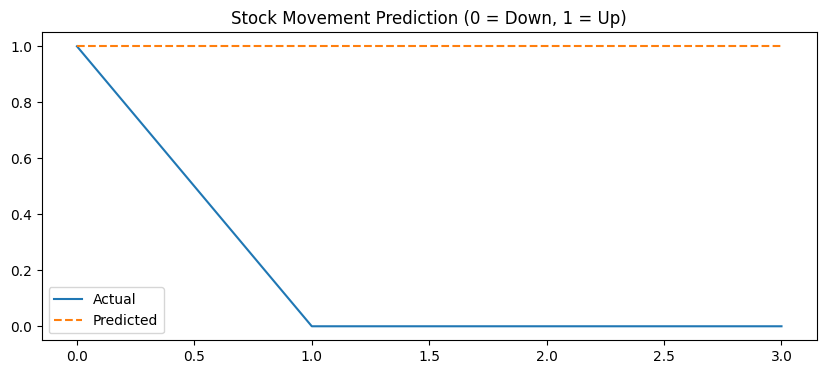

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted", linestyle='--')
plt.legend()
plt.title("Stock Movement Prediction (0 = Down, 1 = Up)")
plt.show()


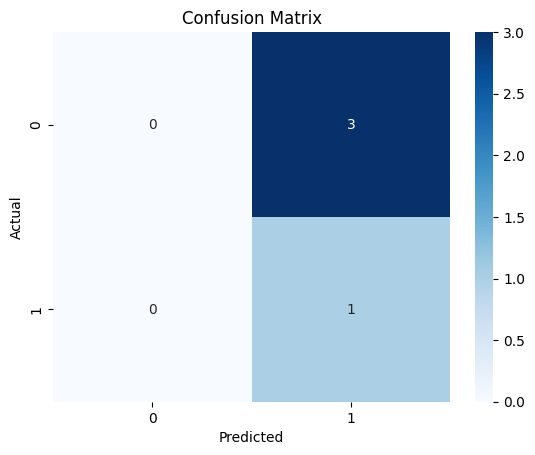

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [32]:
import joblib

joblib.dump(model, 'sentiment_stock_model.pkl')


['sentiment_stock_model.pkl']

In [33]:
model = joblib.load('sentiment_stock_model.pkl')



In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))


Random Forest Accuracy: 0.25


In [35]:
import joblib

# After training
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(model, 'sentiment_model.pkl')


['sentiment_model.pkl']